# Poke graphs and stuff

Data used: pokemon.csv from [here](https://www.kaggle.com/mylesoneill/pokemon-sun-and-moon-gen-7-stats). Now that there are 800+ available pokemon spanning 7 generations, an explorative analysis should yield cool results. 

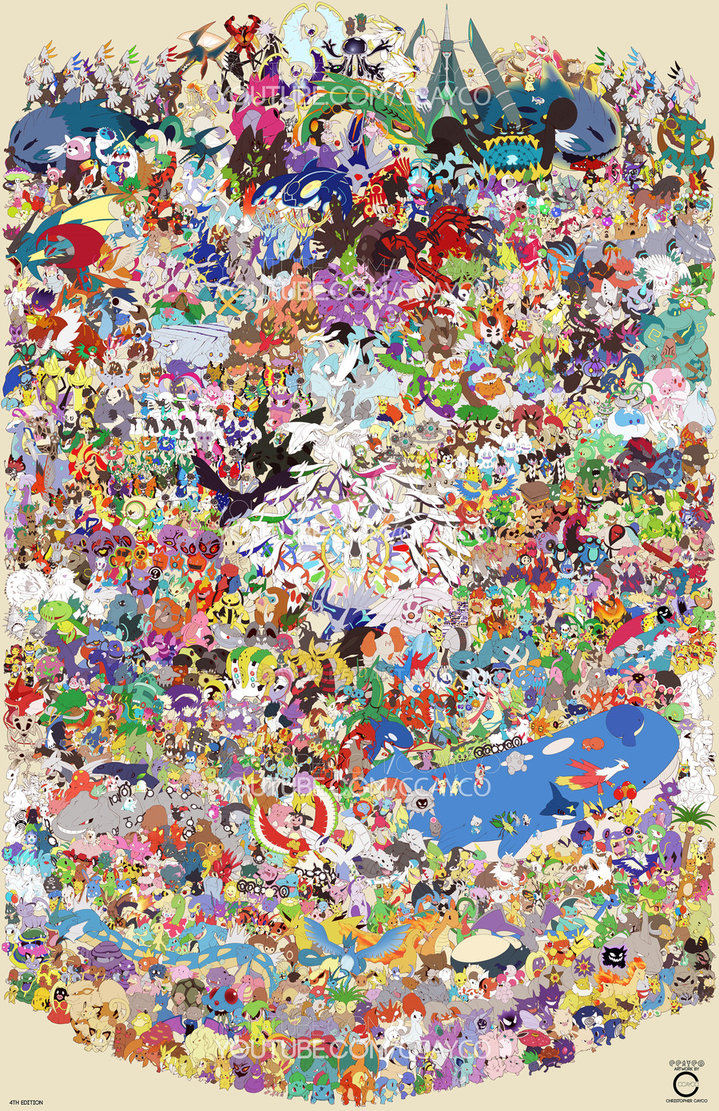

In [1]:
# the libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
pokemon = pd.read_csv('pokemon-sun-and-moon-gen-7-stats/pokemon.csv')
pokemon.head()

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
0,1,1,Bulbasaur,Bulbasaur,Grass,Poison,Overgrow,NaN,Chlorophyll,45,...,15.2 lbs.,"2'04""",NaN,NaN,Seed Pokémon,0.875,0.125,NaN,Monster,Grass
1,2,2,Ivysaur,Ivysaur,Grass,Poison,Overgrow,NaN,Chlorophyll,60,...,28.7 lbs.,"3'03""",NaN,NaN,Seed Pokémon,0.875,0.125,Bulbasaur,Monster,Grass
2,3,3,Venusaur,Venusaur,Grass,Poison,Overgrow,NaN,Chlorophyll,80,...,220.5 lbs.,"6'07""",NaN,NaN,Seed Pokémon,0.875,0.125,Ivysaur,Monster,Grass
3,4,4,Charmander,Charmander,Fire,NaN,Blaze,NaN,Solar Power,39,...,18.7 lbs.,"2'00""",NaN,NaN,Lizard Pokémon,0.875,0.125,NaN,Monster,Dragon
4,5,5,Charmeleon,Charmeleon,Fire,NaN,Blaze,NaN,Solar Power,58,...,41.9 lbs.,"3'07""",NaN,NaN,Flame Pokémon,0.875,0.125,Charmander,Monster,Dragon


## Pokemon features:

id: unique id for each pokemon species / forme combination in this file <br>
ndex: the pokedex number for this pokemon <br>
species: the name of this pokemon <br>
forme: used to differentiate different forms of a single pokemon species <br>
type1: the first type of this pokemon <br>
type2: the secondary type of this pokemon (if it has one) <br>
ability1: the first ability this pokemon could have <br>
ability2: the second ability this pokemon could have <br>
abilityH: the hidden ability this pokemon could have instead of ability1 or ability2 <br>
hp: hit points, or health, defines how much damage a pokemon can withstand before fainting <br>
attack: the base modifier for physical attacks <br>
defense: the base damage resistance against physical attacks <br>
spattack: special attack, the base modifier for special attacks <br>
spdefense: the base damage resistance against special attacks <br>
speed: used in determining which pokemon attacks first each round <br>
total: the sum of hp, attack, defense, spattack, spdefense, and speed <br>
weight: the pokemon's weight in lbs <br>
height: the pokemon's height in feet and inches <br>
dex1: first pokedex description of this pokemon <br>
dex2: second pokedex description of this pokemon <br>
class: the thematic class of pokemon this species is (does not influence game mechanics) <br>
percent-male: the percentage of pokemon of this species which are male <br>
percent-female: the percentage of pokemon of this species which are female <br>
pre-evolution: the pokemon that evolves into this pokemon <br>
egg-group1: a pokemon can breed with any other pokemon in the same egg group <br>
egg-group2: a pokemon can breed with any other pokemon in the same egg group

## Preliminary testing

Let's do a simple regression graph of pokemon hitpoints (hp) vs a sum total of all their stats (total).

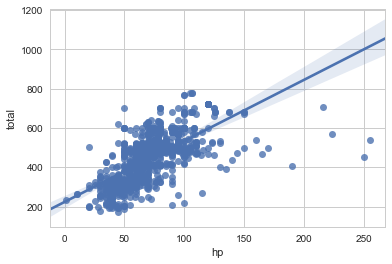

In [3]:
sns.regplot(x='hp', y='total', data=pokemon)

There seem to be a few outliers with hp over 200. Let's isolate them.

In [4]:
pokemon.loc[pokemon['hp'] > 200]

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
112,113,113,Chansey,Chansey,Normal,NaN,Natural Cure,Serene Grace,Healer,250,...,76.3 lbs.,"3'07""",The eggs laid by Chansey are rich in nutrients...,"Not only are these Pokémon fast runners, they’...",Egg Pokémon,0.0,1.0,Happiny,Fairy,NaN
241,242,242,Blissey,Blissey,Normal,NaN,Natural Cure,Serene Grace,Healer,255,...,103.2 lbs.,"4'11""",Even the most ferocious Pokémon become calm wh...,"Its fluffy fur coat acts as a sensor, enabling...",Happiness Pokémon,0.0,1.0,Chansey,Fairy,NaN
798,799,799,Guzzlord,Guzzlord,Dark,Dragon,Beast Boost,Beast Boost,Beast Boost,223,...,1957.7 lbs.,"18'01""",It has gobbled mountains and swallowed whole b...,"A dangerous Ultra Beast, it appears to be eati...",Junkivore Pokémon,NaN,NaN,NaN,Undiscovered,NaN
1014,1016,718,Zygarde,Zygarde (Complete Forme),Dragon,Ground,Power Construct,Power Construct,Power Construct,216,...,1344.8 lbs.,"14'09""",This is Zygarde’s form at times when it uses i...,This is Zygarde’s 100% form. It has enough pow...,Order Pokémon,NaN,NaN,NaN,Undiscovered,NaN


I'll create a dataframe without these outlier pokemon for the sake of the following few graphs. But before moving on, it's important to note that several legendary pokemon have very high stats compared to non-legendaries. For this reason, and only for the next few graphs, let's also create two new dataframes: one for legendaries and another for rest.

In [5]:
pokemon_ = pokemon.loc[pokemon['hp'] < 200]

In [6]:
# list of all legendary pokemon up to Gen 7
legendaries = ['Zapdos', 'Articuno', 'Moltres', 'Mew', 'Mewtwo', 'Raikou', 
               'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Regice', 'Registeel', 
               'Regirock', 'Regigigas', 'Latias', 'Latios', 'Groudon', 
               'Kyogre', 'Rayquaza', 'Azelf', 'Mesprit', 'Uxie', 'Dialga', 
               'Palkia', 'Giratina', 'Cresselia', 'Heatran', 'Cobalion', 
               'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 'Landorus', 
               'Zekrom', 'Reshiram', 'Kyurem', ' Xerneas', 'Yveltal', 'Zygarde', 
               'Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmoem', 
               'Solgaleo', 'Lunala', 'Cosmog', 'Necrozma', 'Nihilego', 'Buzzwole', 
               'Pheromosa', 'Xurkitree', 'Celesteela', 'Kartan', 'Guzzlord']


pkmn_nolegend = pokemon_[np.logical_not(pokemon_.species.isin(legendaries))] # non-legendaries
pkmn_legend = pokemon_[pokemon_.species.isin(legendaries)] # legendaries

## Basic poke-stat analysis

How do individual and total stats of non-legendary pokemon compare against hp?

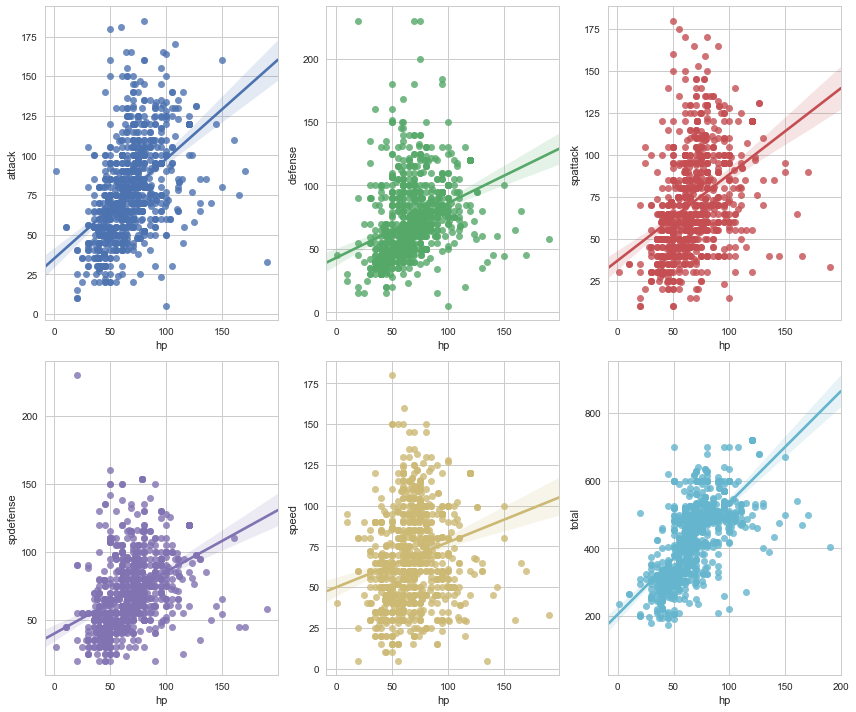

In [7]:
fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,10))
sns.regplot(x='hp', y='attack', data=pkmn_nolegend, ax=ax1)
sns.regplot(x='hp', y='defense', data=pkmn_nolegend, ax=ax2)
sns.regplot(x='hp',y='spattack', data=pkmn_nolegend, ax=ax3)
sns.regplot(x='hp',y='spdefense', data=pkmn_nolegend, ax=ax4)
sns.regplot(x='hp', y='speed', data=pkmn_nolegend, ax=ax5)
sns.regplot(x='hp', y='total', data=pkmn_nolegend, ax=ax6)
fig.tight_layout()

How do individual and total stats of legendary pokemon compare against hp?

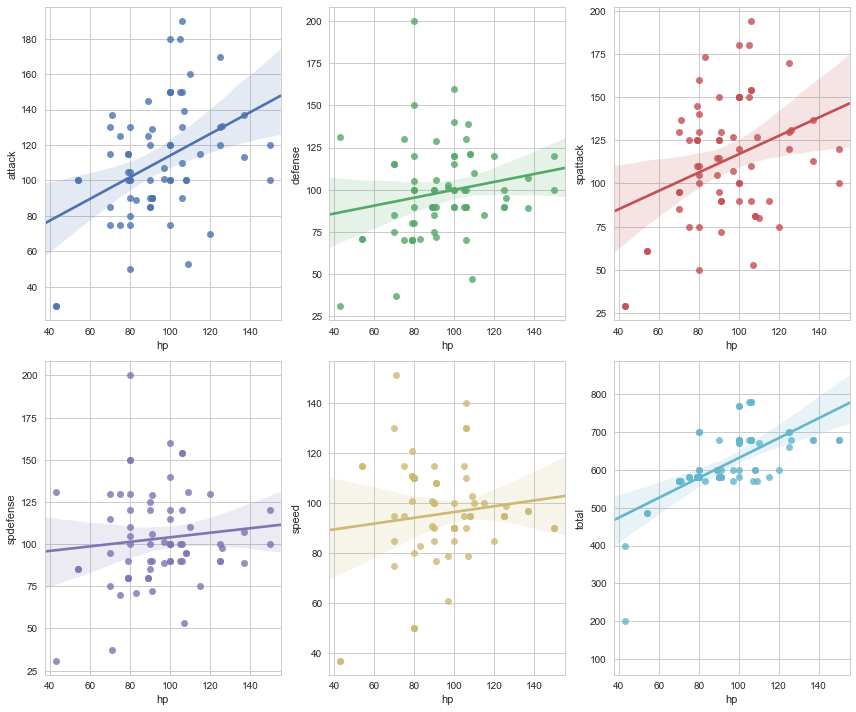

In [8]:
fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,10))
sns.regplot(x='hp', y='attack', data=pkmn_legend, ax=ax1)
sns.regplot(x='hp', y='defense', data=pkmn_legend, ax=ax2)
sns.regplot(x='hp',y='spattack', data=pkmn_legend, ax=ax3)
sns.regplot(x='hp',y='spdefense', data=pkmn_legend, ax=ax4)
sns.regplot(x='hp', y='speed', data=pkmn_legend, ax=ax5)
sns.regplot(x='hp', y='total', data=pkmn_legend, ax=ax6)
fig.tight_layout()

## Primary abilities

Which abilities are more prominent among pokemon?

(-0.5, 699.5, 740.5, -0.5)

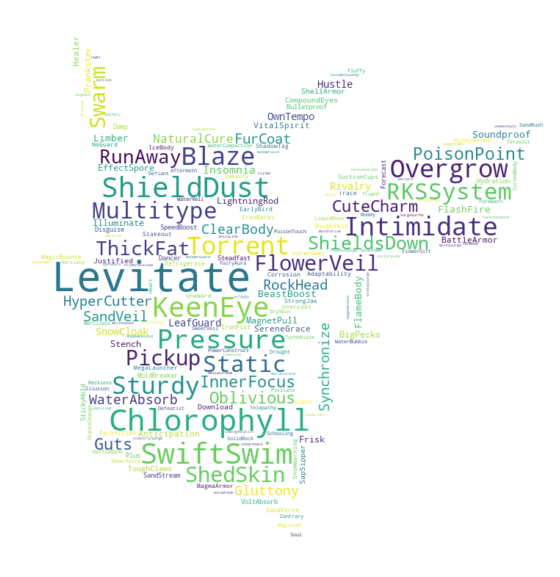

In [9]:
ability_1 = [i.replace(' ', '') for i in pokemon['ability1'].astype(str)]
ability_1 = pd.DataFrame({'ability_1': ability_1})
pokemon['ability1'] = ability_1

abilities = pokemon['ability1'].to_string()
pikachu = np.array(Image.open('pikachu.jpg'))
wordcloud = WordCloud(background_color="white", mask=pikachu, collocations=False).generate(abilities)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

[Levitate](https://www.serebii.net/abilitydex/levitate.shtml): By floating in the air, the Pokémon receives full immunity to all Ground-type moves.

Who is the strongest pokemon (with highest total stats) that has Levitate as its primary ability? For this portion, I'll be dropping all the 'Unown' pokemon, as they all have very low stats (plus there being 28 variations of them appearing in the dataset, our bar graph will be flooded).

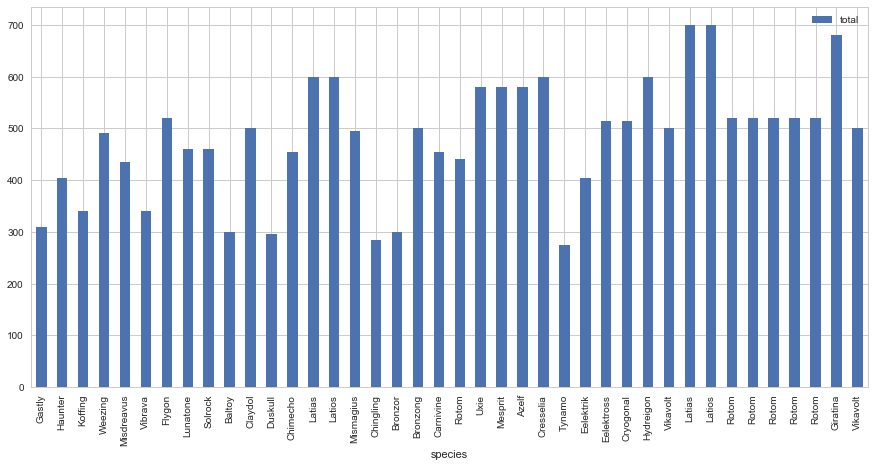

In [10]:
pkmn_levitate = pokemon[(pokemon['ability1'] == 'Levitate') & (pokemon['species'] != 'Unown')]
pkmn_levitate.plot.bar(x = 'species', y = 'total', figsize=(15,7))

So Latias and Latios have the highest total stats of all pokemon that have Levitate as their primary ability. These two pokemon also happen to have Dragon as their secondary type, and Dragon types have the highest total stats of all pokemon on average (as can be seen in the boxplots of the section below).

## Type distributions

(-1.103709973102702,
 1.100176665803333,
 -1.1010856359727297,
 1.1044934531389781)

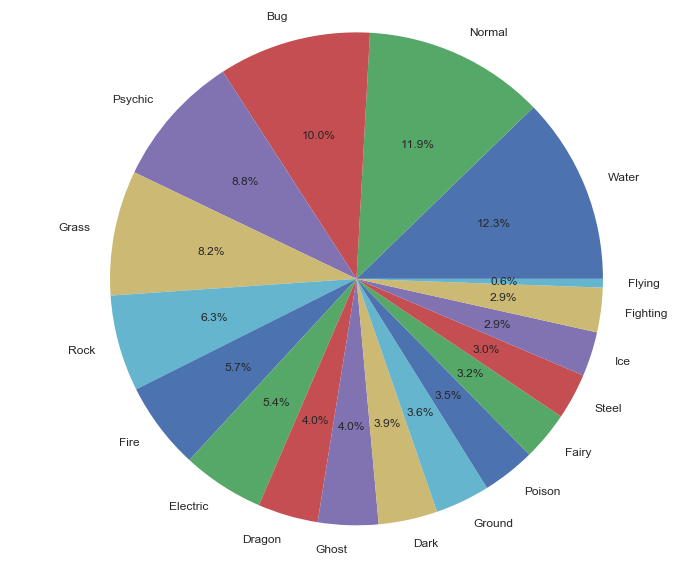

In [11]:
pokemon.type1.value_counts().plot(kind='pie', figsize=(12,10), fontsize=12, autopct='%1.1f%%')
plt.axis('off')
plt.axis('equal')

Let's see the stat distribution for each pokemon type.

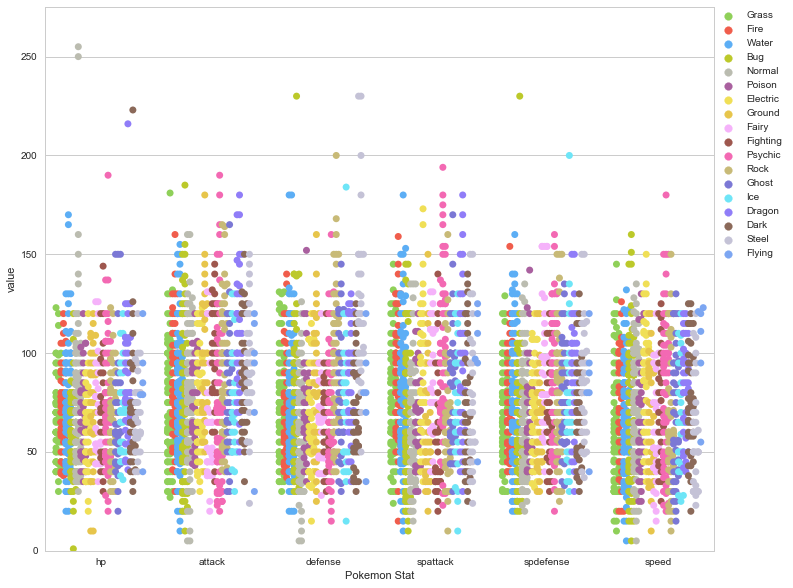

In [12]:
pokemon_ = pokemon.filter(['type1', 'hp', 'attack', 'defense', 'spattack', 'spdefense', 'speed'], axis=1)
pokemon_melted = pd.melt(pokemon_, id_vars=['type1'], var_name='Pokemon Stat')

with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    sns.swarmplot(x='Pokemon Stat', y='value', data=pokemon_melted, hue='type1', split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Let's go a little deeper and isolate each stat vs primary type (type1) and secondary type (type2) of pokemon.

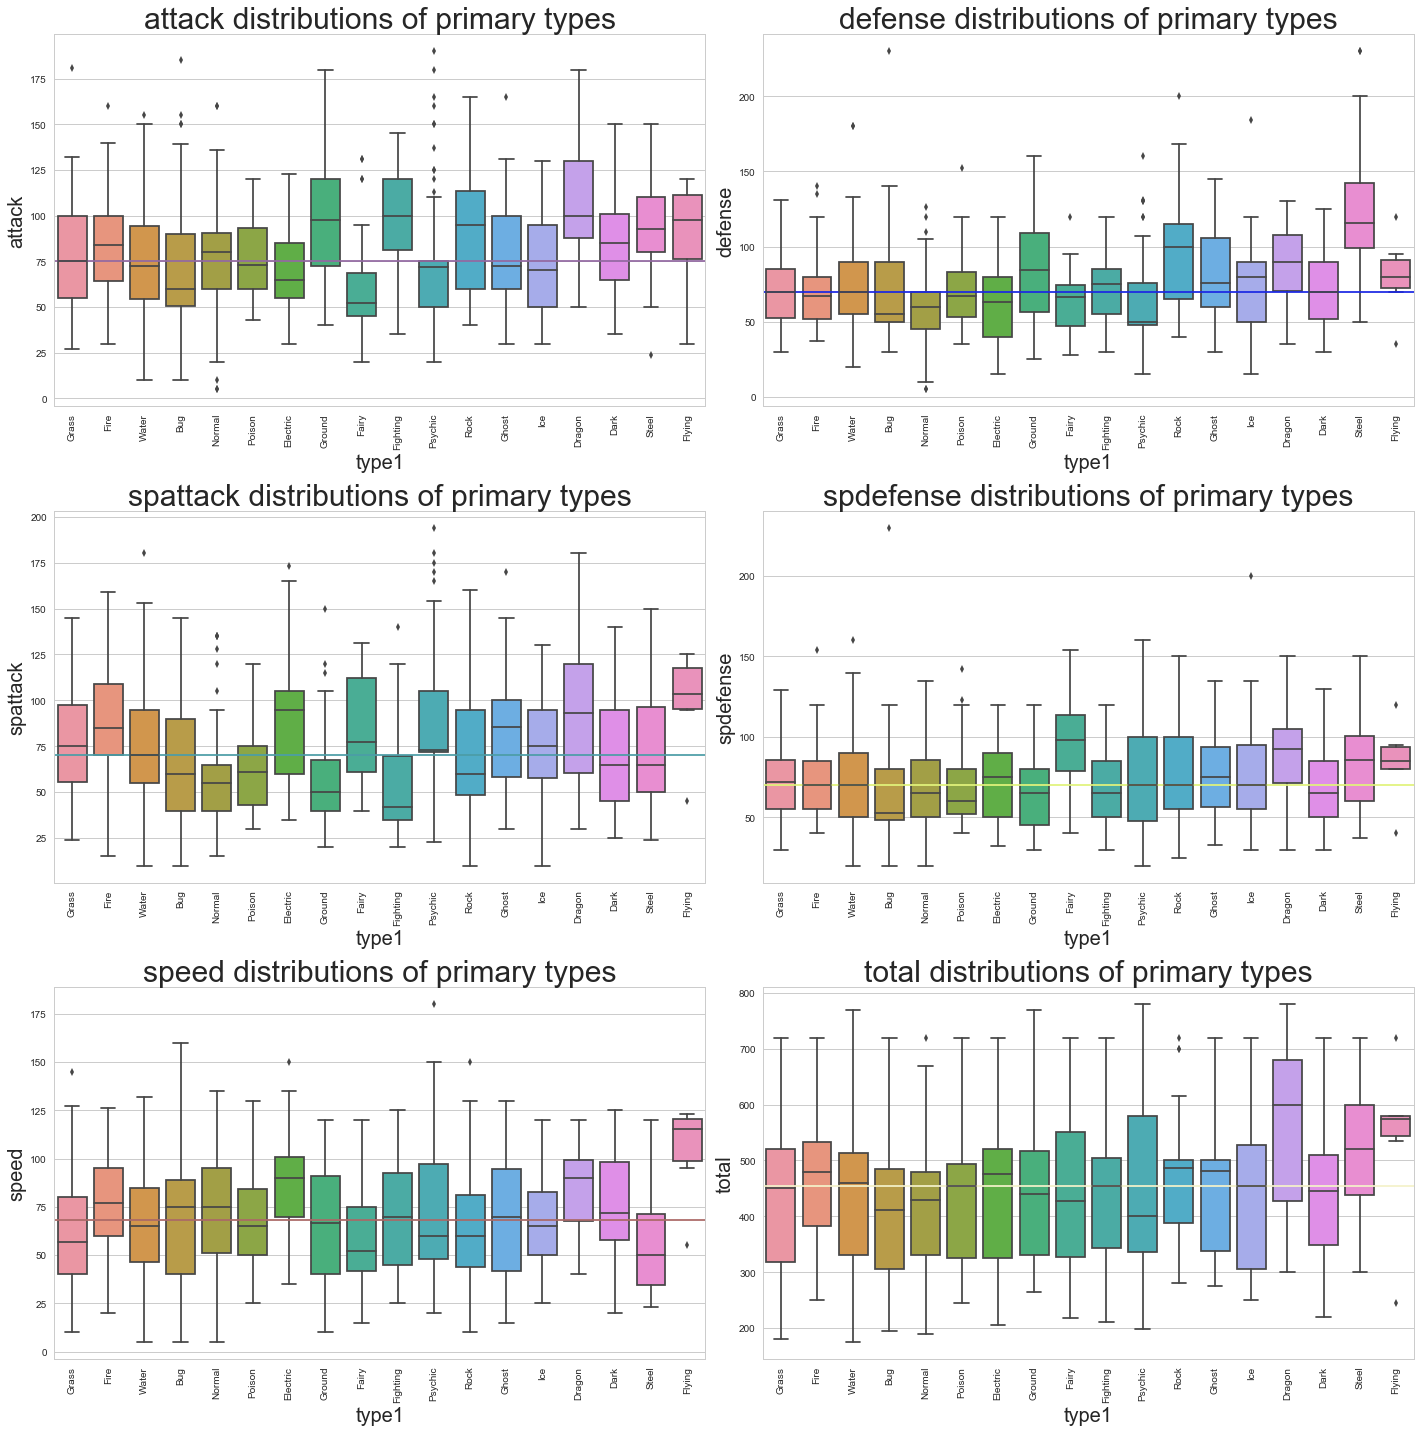

In [13]:
poke_stats = pokemon.columns[10:16]

plt.figure(figsize=(20,20))
sns.set_context(rc={"axes.titlesize":30,"axes.labelsize":20})
for i, stat in enumerate(poke_stats):
    title = "{stat} distributions of primary types".format(stat = stat)
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='type1', y=stat, data = pokemon)
    plt.axhline(pokemon[stat].median(), color=np.random.rand(3))

plt.tight_layout()

Immediately we can infer the following from primary type median-values:

Fairy pkmn have the lowest attack <br>
Steel pkmn have the highest defense <br>
Flying pkmn have the highest speed

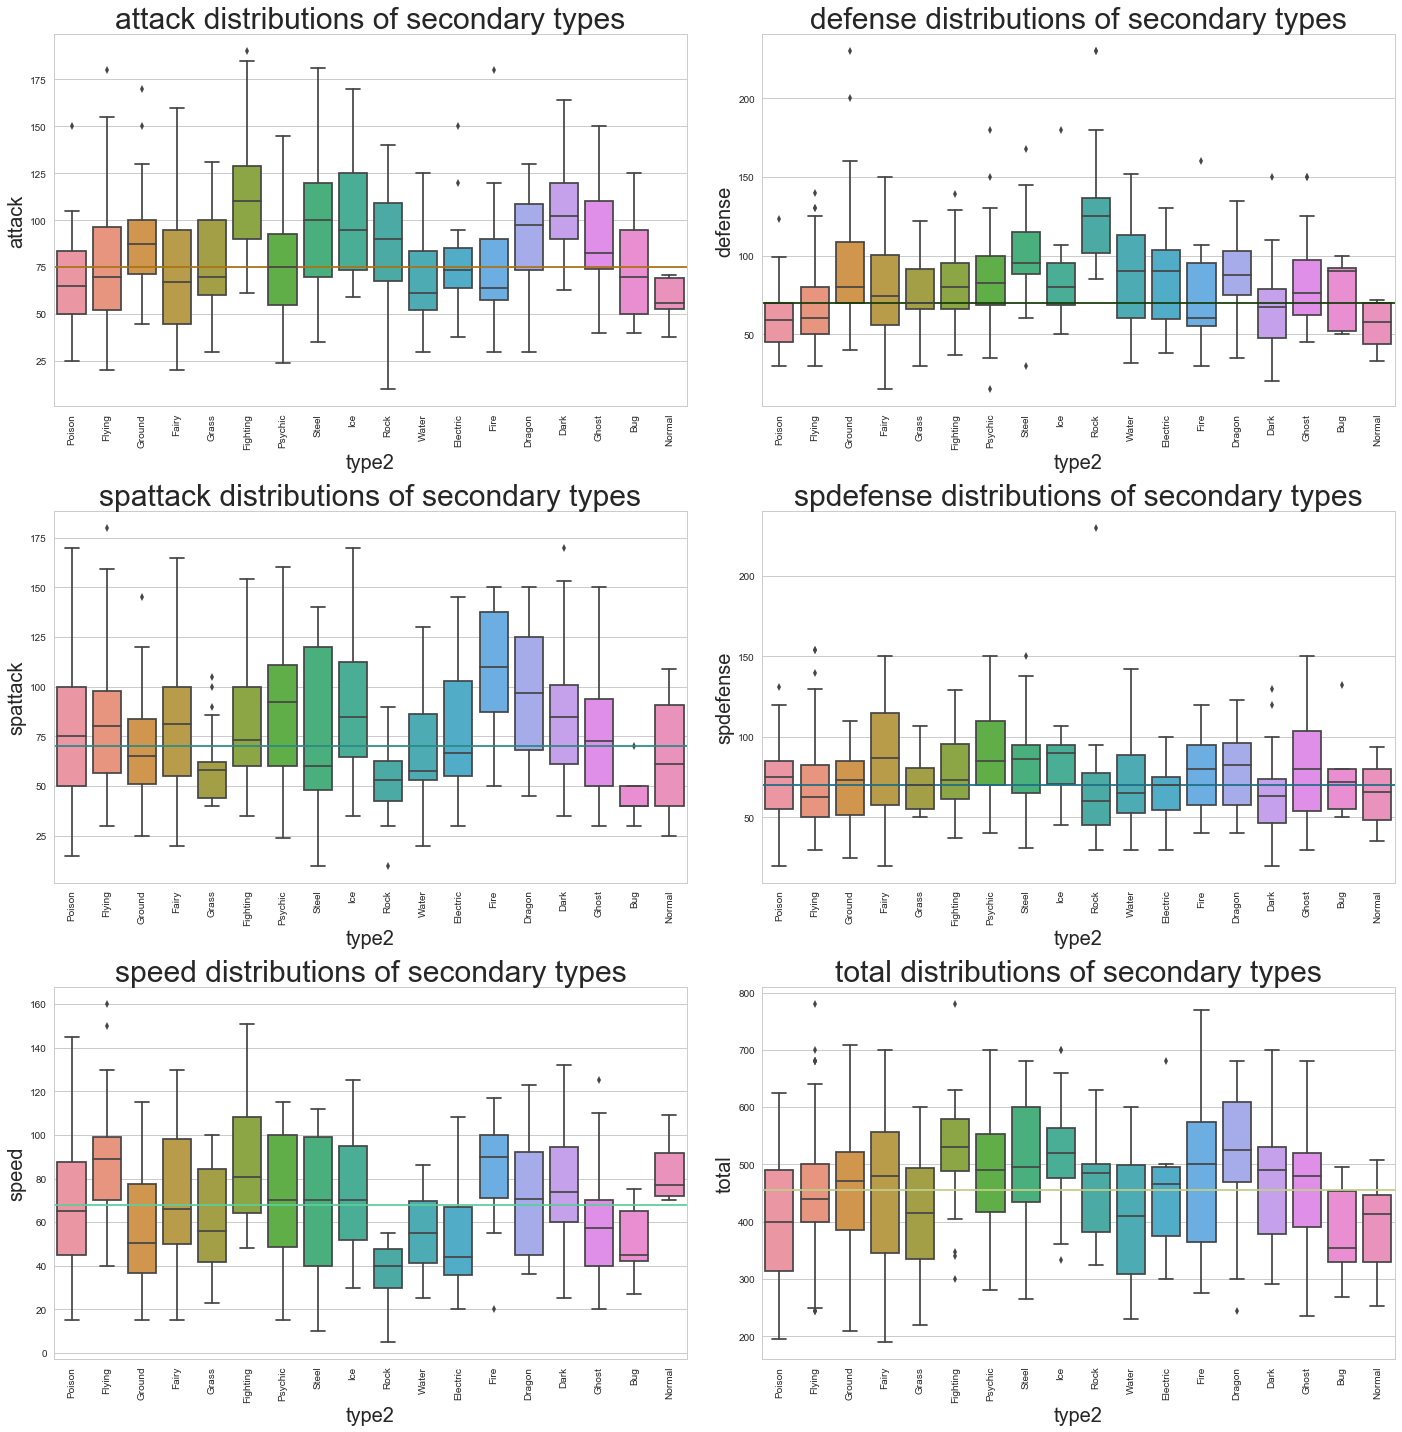

In [14]:
plt.figure(figsize=(20,20))
sns.set_context(rc={"axes.titlesize":30,"axes.labelsize":20})
for i, stat in enumerate(poke_stats):
    title = "{stat} distributions of secondary types".format(stat = stat)
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='type2', y=stat, data = pokemon)
    plt.axhline(pokemon[stat].median(), color=np.random.rand(3))

plt.tight_layout()

As for the secondary types:

Normal pkmn have the lowest attack <br>
Rock pkmn have the highest defense <br>
Flying pkmn are tied with Fire pkmn for highest speed

Moreover, for both primary and secondary types, Dragon pkmn have the highest total stats.

Now let's look at the distribution of pokemon weights (in lbs.) over primary type.

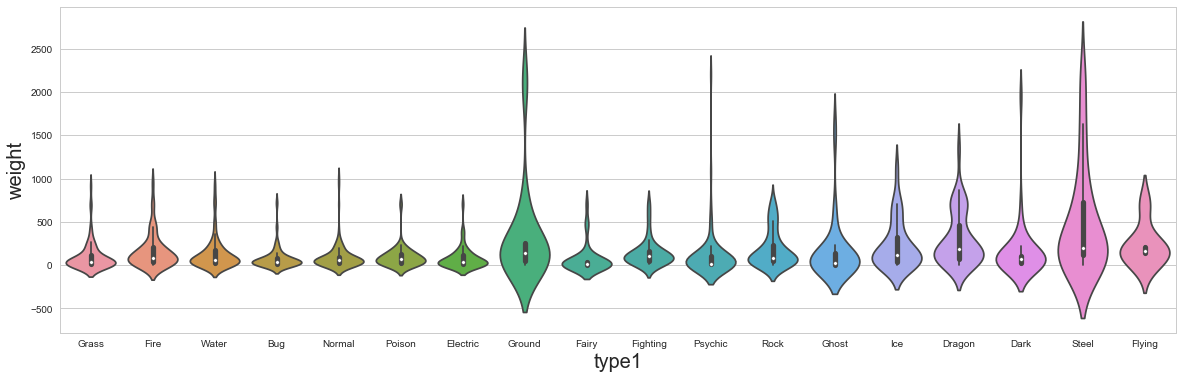

In [15]:
poke_wt = [i.replace(' lbs.', '') for i in pokemon['weight'].astype(str)]
poke_wt = pd.DataFrame({'poke_wt': poke_wt}).astype(float)
pokemon['weight'] = poke_wt
pokemon.head()

plt.figure(figsize=(20,6))
sns.violinplot(x='type1', y='weight', data = pokemon, scale = 'width')

There are some heavy outliers. Let's see who they are.

In [16]:
pokemon.loc[pokemon['weight'] > 2000]

,id,ndex,species,forme,type1,type2,ability1,ability2,abilityH,hp,...,weight,height,dex1,dex2,class,percent-male,percent-female,pre-evolution,egg-group1,egg-group2
382,383,383,Groudon,Groudon,Ground,NaN,Drought,NaN,NaN,100,...,2094.4,"11'06""",NaN,NaN,Continent Pokémon,NaN,NaN,NaN,Undiscovered,NaN
749,750,750,Mudsdale,Mudsdale,Ground,NaN,OwnTempo,Stamina,Inner Focus,100,...,2028.3,"8'02""",It spits a mud that provides resistance to bot...,"Its heavy, mud-covered kicks are its best mean...",Draft Horse Pokémon,0.5,0.5,Mudbray,Field,NaN
789,790,790,Cosmoem,Cosmoem,Psychic,NaN,Sturdy,Sturdy,Sturdy,43,...,2204.4,"0'04""","Motionless as if dead, its body is faintly war...",There’s something accumulating around the blac...,Protostar Pokémon,NaN,NaN,Cosmog,Undiscovered,NaN
796,797,797,Celesteela,Celesteela,Steel,Flying,BeastBoost,Beast Boost,Beast Boost,97,...,2204.4,"30'02""",It appeared from the Ultra Wormhole. Witnesses...,One kind of Ultra Beast. Witnesses have seen i...,Launch Pokémon,NaN,NaN,NaN,Undiscovered,NaN
894,896,376,Metagross,Metagross (Mega Metagross),Steel,Psychic,ToughClaws,NaN,NaN,80,...,2078.7,"8'02""","This form results from one Metagross, one Meta...",Mega Evolution stimulated its brain. It emerge...,Iron Leg Pokémon,NaN,NaN,Metang,Mineral,NaN
898,900,382,Groudon,Groudon (Primal Reversion),Ground,Fire,DesolateLand,NaN,NaN,100,...,2204.0,"16'05""",NaN,NaN,Continent Pokémon,NaN,NaN,NaN,Undiscovered,NaN


Incredible. With a common weight of 2204.4 lbs, Cosmoem and Celesteela are miles apart in their heights (actually only feet)! The pokedex entries of the two pokemon are as follows.

In [17]:
print(pokemon.iloc[789]['dex1'])
print()
print(pokemon.iloc[789]['dex2'])

Motionless as if dead, its body is faintly warm to the touch. In the distant past, it was called the cocoon of the stars.

There’s something accumulating around the black core within its hard shell. People think this Pokémon may come from another world.


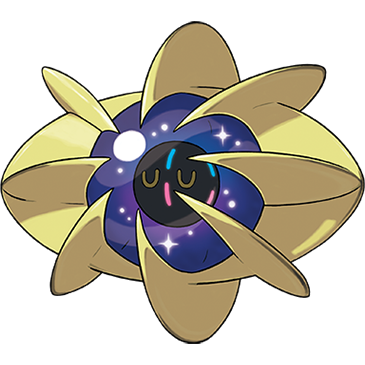

In [18]:
print(pokemon.iloc[796]['dex1'])
print()
print(pokemon.iloc[796]['dex2'])

It appeared from the Ultra Wormhole. Witnesses observed it flying across the sky at high speed.

One kind of Ultra Beast. Witnesses have seen it burn down a forest by expelling gas from its two arms.


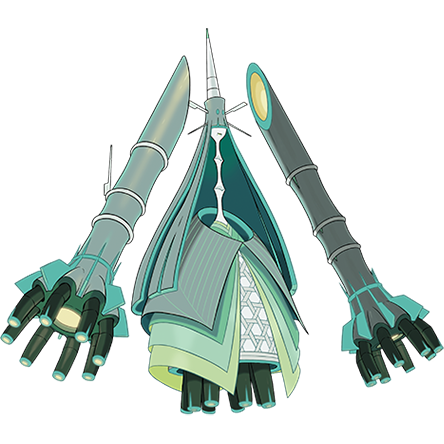